# <h1 align="center">**Financial Signal Processing Coursework Part One**</h1>


<h3 align="center">
  Prof. Danilo P. Mandic
  <br>
XXXNAME
  <br>
  XXXID
</h3>



# **1. Regression Methods**

## **1.1 Processing stock price data in Python**
For the following question, initialise your Python session by importing the following modules:

```python
import numpy as np    # scientific library
import pandas as pd   # data structure library
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

## Task1:
``` python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/priceData.csv
```
using the following commands:
``` python
px = pd.read_csv("priceData.csv")
```
and perform the natural-log transform of the price
``` python
using logpx = np.log(px).
```
Plot the time-series using logpx.plot().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import jarque_bera

# Note: This example demonstrates a complete workflow for:
# 1) Reading CSV data
# 2) Setting date as the index
# 3) Computing log prices
# 4) Calculating rolling mean/std
# 5) Calculating simple and log returns
# 6) Performing a Jarque-Bera test for normality


In [2]:
# 1. Load the CSV file
# "parse_dates=['date']" tells pandas to interpret the 'date' column as a datetime.
# "dayfirst=True" is used if your dates are in D/M/Y format. Adjust as needed.
df = pd.read_csv(
    'priceData.csv',
    parse_dates=['date'],
    dayfirst=True
)

# 2. Print the first few rows to verify the structure
print("DataFrame head:")
print(df.head())
print()


DataFrame head:
        date  SPX Index
0 1930-01-02      21.18
1 1930-01-03      21.23
2 1930-01-06      21.50
3 1930-01-07      21.31
4 1930-01-08      21.29



将 date 列设置成索引（set_index('date', inplace=True))，这样后续在进行时间序列分析（滚动窗口等）时，会直接按照时间来处理。
df.shape 可以查看当前数据表的行列数量，df.columns 列出所有列名，这些有助于快速了解数据结构。


In [3]:
# 3. Set 'date' as the DataFrame index for time-series operations
df.set_index('date', inplace=True)

# 4. Check the shape and columns
print("DataFrame shape:", df.shape)
print("Columns:", df.columns.tolist())
print()


DataFrame shape: (22629, 1)
Columns: ['SPX Index']



将价格列命名为 price_col = 'SPX Index'，根据你的CSV实际列名进行调整。
df['log_price'] = np.log(df[price_col]) 这一步对价格取自然对数，得到新的列 log_price。

In [4]:
# Assuming the price column is named "SPX Index". Adjust if necessary.
price_col = 'SPX Index'

# 5. Compute the natural logarithm of the price
df['log_price'] = np.log(df[price_col])

# 6. Print a few rows to see the new column
print("After adding log_price:")
print(df[[price_col, 'log_price']].head())
print()


After adding log_price:
            SPX Index  log_price
date                            
1930-01-02      21.18   3.053057
1930-01-03      21.23   3.055415
1930-01-06      21.50   3.068053
1930-01-07      21.31   3.059176
1930-01-08      21.29   3.058237



图像中通常可以看到：对数价格的曲线会“压缩”大幅度的波动，形状更平缓。

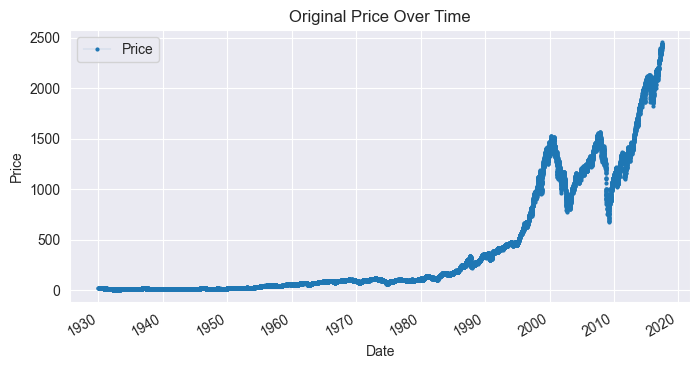

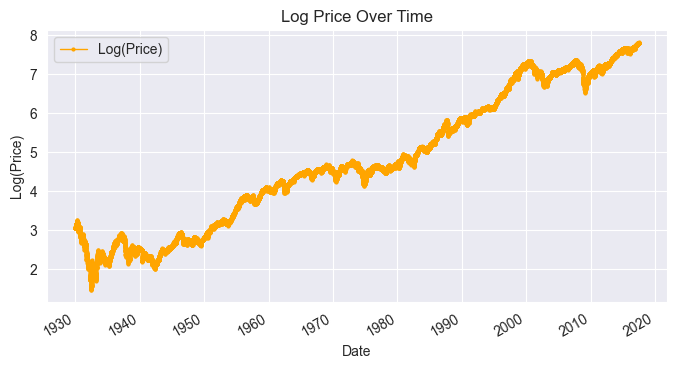

In [10]:
# 7. Plot the original price with a thinner line and labeled axes
plt.figure(figsize=(8,4))
df[price_col].plot(
    marker='o',
    label='Price',
    linewidth=0.1,  # thinner line width
    markersize=2    # smaller marker size
)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Original Price Over Time")
plt.legend()
plt.show()

# 8. Plot the log-transformed price with a thinner line and labeled axes
plt.figure(figsize=(8,4))
df['log_price'].plot(
    marker='o',
    color='orange',
    label='Log(Price)',
    linewidth=1.0,  # thinner line width
    markersize=2
)
plt.xlabel("Date")
plt.ylabel("Log(Price)")
plt.title("Log Price Over Time")
plt.legend()
plt.show()


window_size = 5 表示使用 5 天的数据来计算滚动均值和标准差，这里仅做示例。如果数据量大，可使用 252 天作为一年的近似交易日数。
df[price_col].rolling(window_size).mean() 计算滚动均值；.std() 计算滚动标准差。对 log_price 也做相同操作。
将滚动均值与滚动标准差画出来，可以帮助你观察价格和对数价格在短期内的一阶、二阶统计量变化。

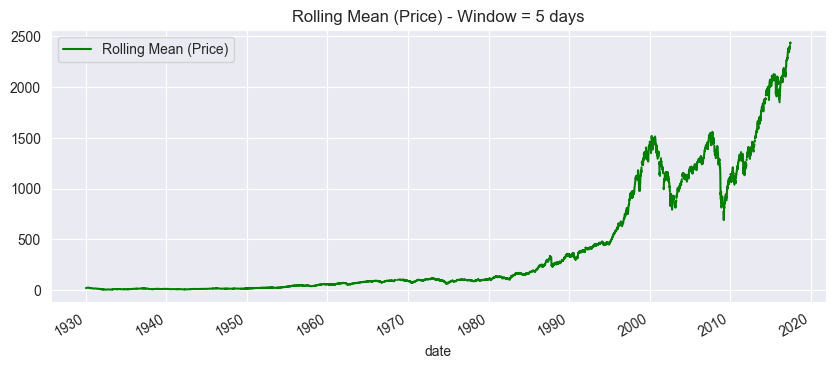

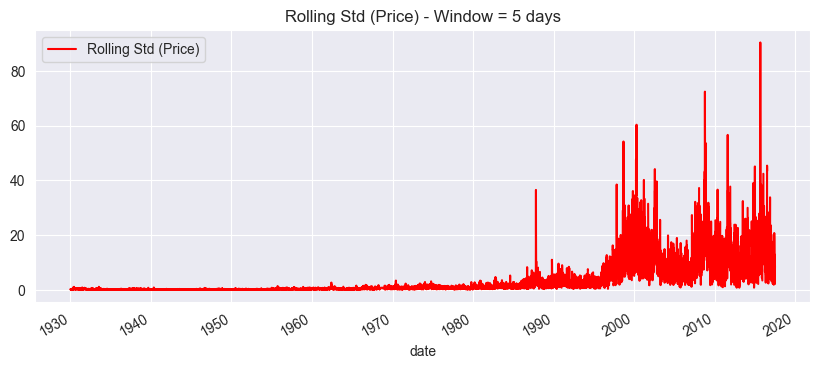

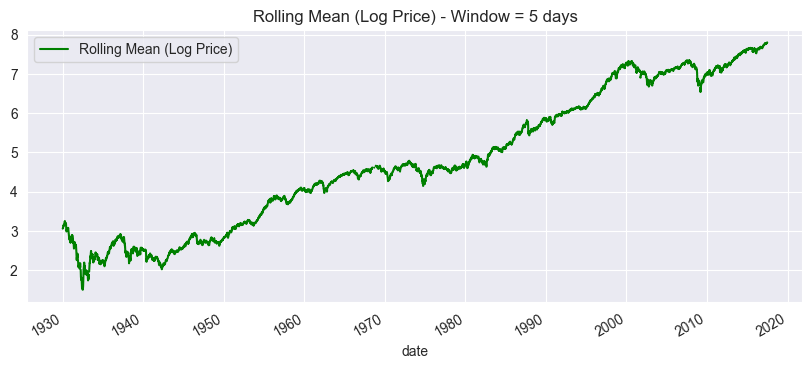

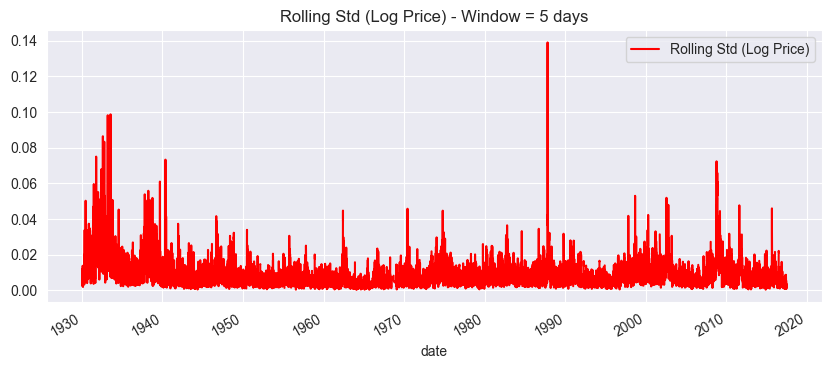

In [22]:
# 9. Specify a rolling window. Here we use 5 days just for demonstration.
# For a typical annual window, people often use 252 trading days.
window_size = 5

# 10. Calculate rolling mean and rolling std for both price and log_price
df['price_mean'] = df[price_col].rolling(window_size).mean()
df['price_std'] = df[price_col].rolling(window_size).std()
df['log_price_mean'] = df['log_price'].rolling(window_size).mean()
df['log_price_std'] = df['log_price'].rolling(window_size).std()

# 11. Plot rolling mean for original price
plt.figure(figsize=(10,4))
df['price_mean'].plot(color='green', label='Rolling Mean (Price)')
plt.title("Rolling Mean (Price) - Window = {} days".format(window_size))
plt.legend()
plt.show()

# 12. Plot rolling standard deviation for original price
plt.figure(figsize=(10,4))
df['price_std'].plot(color='red', label='Rolling Std (Price)')
plt.title("Rolling Std (Price) - Window = {} days".format(window_size))
plt.legend()
plt.show()

# 13. Plot rolling mean for log price
plt.figure(figsize=(10,4))
df['log_price_mean'].plot(color='green', label='Rolling Mean (Log Price)')
plt.title("Rolling Mean (Log Price) - Window = {} days".format(window_size))
plt.legend()
plt.show()

# 14. Plot rolling standard deviation for log price
plt.figure(figsize=(10,4))
df['log_price_std'].plot(color='red', label='Rolling Std (Log Price)')
plt.title("Rolling Std (Log Price) - Window = {} days".format(window_size))
plt.legend()
plt.show()


简单收益率 pct_change() 可以快速得到
𝑃
𝑡
−
𝑃
𝑡
−
1
𝑃
𝑡
−
1
P
t−1
​

P
t
​
 −P
t−1
​

​
 。
对数收益率直接对对数价格做差分，df['log_price'].diff()。
通常对数收益率在统计建模和多期复合收益率分析中更常用。

C:\Users\polo_\AppData\Local\Temp\ipykernel_17568\416673085.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['simple_return'] = df[price_col].pct_change()


Simple return and log return:
            simple_return  log_return
date                                 
1930-01-02            NaN         NaN
1930-01-03       0.002361    0.002358
1930-01-06       0.012718    0.012638
1930-01-07      -0.008837   -0.008876
1930-01-08      -0.000939   -0.000939



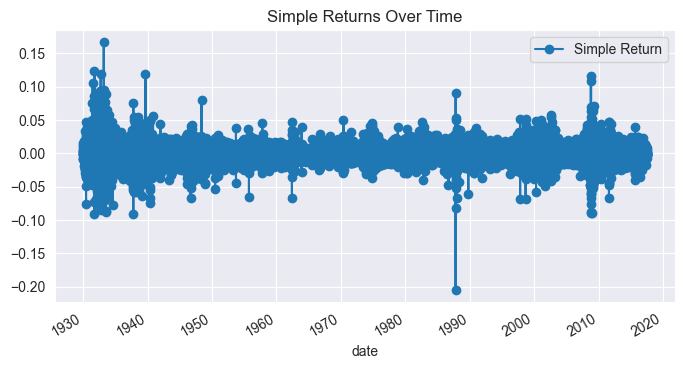

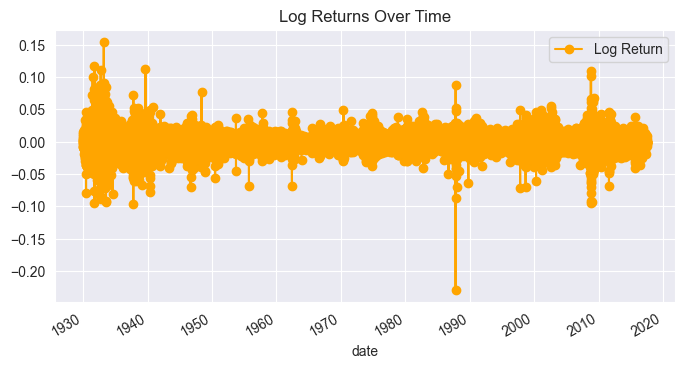

In [23]:
# 15. Compute simple returns and log returns

# Simple return = (P_t - P_{t-1}) / P_{t-1}
df['simple_return'] = df[price_col].pct_change()

# Log return = log(P_t) - log(P_{t-1})
df['log_return'] = df['log_price'].diff()

# 16. Display the first rows of returns
print("Simple return and log return:")
print(df[['simple_return', 'log_return']].head())
print()

# 17. Plot the simple returns
plt.figure(figsize=(8,4))
df['simple_return'].plot(marker='o', label='Simple Return')
plt.title("Simple Returns Over Time")
plt.legend()
plt.show()

# 18. Plot the log returns
plt.figure(figsize=(8,4))
df['log_return'].plot(marker='o', color='orange', label='Log Return')
plt.title("Log Returns Over Time")
plt.legend()
plt.show()


In [24]:
# 19. Drop NaN values before statistical tests
simple_return_clean = df['simple_return'].dropna()
log_return_clean = df['log_return'].dropna()

# 20. Perform Jarque-Bera test for both simple and log returns
if len(simple_return_clean) > 1:
    jb_stat_s, jb_pval_s = jarque_bera(simple_return_clean)
    print(f"Jarque-Bera p-value for Simple Return: {jb_pval_s}")
else:
    print("Not enough data points for simple return JB test.")

if len(log_return_clean) > 1:
    jb_stat_l, jb_pval_l = jarque_bera(log_return_clean)
    print(f"Jarque-Bera p-value for Log Return: {jb_pval_l}")
else:
    print("Not enough data points for log return JB test.")


Jarque-Bera p-value for Simple Return: 0.0
Jarque-Bera p-value for Log Return: 0.0
